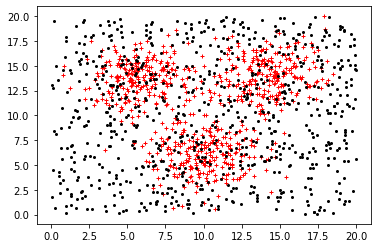

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

plt.plot(X[:int(N/2), 0], X[:int(N/2), 1], 'r+', X[int(N/2):, 0], X[int(N/2):, 1], 'k. ', ms=4)

Text(0, 0.5, 'Accuracy')

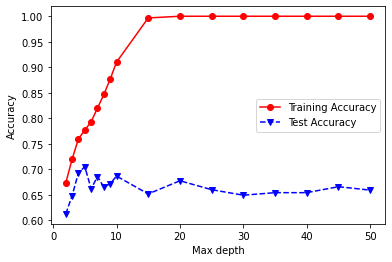

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_est = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#plot
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')